### Student: Ruben Petrosyan

### You can find this and my other homeworks at https://github.com/Rubenssio/ACA-ML0-Course

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Load the dataset from the file Ecommerce.csv

```
This dataset includes the following data for 200 online customers:

- Email
- Adress
- Avatar
- Avg Session Length (everage time they spent on usage)
- Time on App (time they spent using the application)
- Time on Website (time they spent using the website)
- Length of Membership (for how long they have been a user)
- Yearly Amount Spent (how much money they spend yearly)

Your goal will be to estimate the value of the Yearly Amount Spent using the feature(s) of the users
```

In [2]:
data = pd.read_csv("Ecommerce.csv")
data.head()

,Email,Address,Avatar,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank TunnelWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer CommonDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582Cobbborough, DC ...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David ThroughwayPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez PassagePort Jacobville, PR 372...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


### Get rid of non-numerical columns of the dataset

In [3]:
data.drop(['Email', 'Address', 'Avatar'], axis= 1, inplace= True)
data.head()

,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


### Use Yearly Amount Spent as your target variable. Plot the relationship of each of the numerical features with the target variable

Text(18.125, 0.5, 'Yearly Amount Spent')

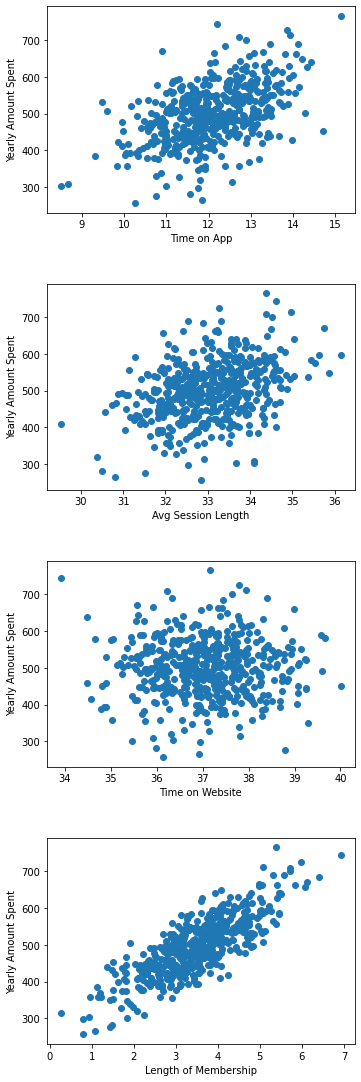

In [4]:
fig, axs = plt.subplots(4, 1)
fig.set_figwidth(5)
fig.set_figheight(15)
fig.tight_layout(h_pad = 5)

axs[0].scatter(data['Time on App'], data['Yearly Amount Spent'])
axs[0].set_xlabel('Time on App')
axs[0].set_ylabel('Yearly Amount Spent')

axs[1].scatter(data['Avg Session Length'], data['Yearly Amount Spent'])
axs[1].set_xlabel('Avg Session Length')
axs[1].set_ylabel('Yearly Amount Spent')

axs[2].scatter(data['Time on Website'], data['Yearly Amount Spent'])
axs[2].set_xlabel('Time on Website')
axs[2].set_ylabel('Yearly Amount Spent')

axs[3].scatter(data['Length of Membership'], data['Yearly Amount Spent'])
axs[3].set_xlabel('Length of Membership')
axs[3].set_ylabel('Yearly Amount Spent')

### Leave only one feature that has a linear relationship with the target variable.

In [5]:
data = data[['Length of Membership', 'Yearly Amount Spent']]
data.head()

,Length of Membership,Yearly Amount Spent
0,4.082621,587.951054
1,2.664034,392.204933
2,4.104543,487.547505
3,3.120179,581.852344
4,4.446308,599.406092


### Divide the dataset into training and test sets with the ratio 80:20.

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
xTrain, xTest, yTrain, yTest = train_test_split(
    data[['Length of Membership']], data[['Yearly Amount Spent']],
    test_size= 0.2, random_state= 42)

In [8]:
len(xTrain), len(xTest)

(400, 100)

In [9]:
xTrain.head()

,Length of Membership
249,3.634996
433,2.117383
19,4.064549
322,4.086566
332,2.190132


In [10]:
yTrain.head()

,Yearly Amount Spent
249,518.786483
433,434.144202
19,605.061039
322,478.262126
332,424.202827


In [11]:
xTest.head()

,Length of Membership
361,3.434560
73,3.851579
374,4.238296
155,2.941411
104,3.428860


In [12]:
yTest.head()

,Yearly Amount Spent
361,401.033135
73,534.777188
374,418.602742
155,503.978379
104,410.069611


### Use the resulting train and test sets with the next 2 functions to fit linear regression and plot the resulting regression line.

The first function is `fit_1d_linear_regression` that takes two vectors $x$ and $y$, and returns a numpy array ($\beta_0, \beta_1)$, where $\beta_0$ is the intercept of the line, and $\beta_1$ is the slope. 

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
def fit_1d_linear_regression(data_vector, response_vector):
    """
    :param data_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x)
    :param response_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is label (y)
    :return: numpy array beta of coefficients of the regression
    Note: You can avoid the intercept for simplicity
    """
    
    regr = LinearRegression()
    
    regr.fit(data_vector, response_vector)
    
    return regr.coef_, regr.intercept_, regr

The second function is `plot_line` function, that takes $\beta_0, \beta_1, x, y$ and plots a scatter plot of the data, and the line $y = \beta_0 + \beta_1 x$. And saves the plot in `YOURNAME.png`

In [15]:
def plot_fitted_line(b0: float,
                     b1: float,
                     x,
                     y,
                     username: str):
    """
    :param b0: Intercept of line to plot
    Note: avoid this if you don't have an intercept in the previous function
    :param b1: Slope of the line to plot
    :param x: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x coordinates)
    :param y: A pandas series object (i.e. a column of a dataframe),
                        where each element is a label (y coordinates)
    """
    
    plt.scatter(x, y, color= 'black')
    
    xmin = x.min()
    xmax = x.max()
    plt.plot([xmin, xmax], [b0 + b1 * xmin, b0 + b1 * xmax], color= 'blue', linewidth= 3)
    
    plt.xlabel(username[0])
    plt.ylabel(username[1])
    plt.title(f'Regression line\n{username[0]} vs {username[1]}')
    
    plt.xticks(())
    plt.yticks(())
    
    plt.show()

### Plot example

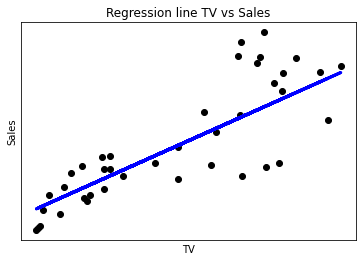

### Now fit the linear regression to the data containing only 1 feature using sklearn and compare the results with your own fit_1d_linear_regression function
student not: didn't it mean - "your own plot_fitted_line function"?

In [16]:
coef, intercept, result = fit_1d_linear_regression(xTrain, yTrain)
coef, intercept

(array([[64.64010065]]), array([271.3521128]))

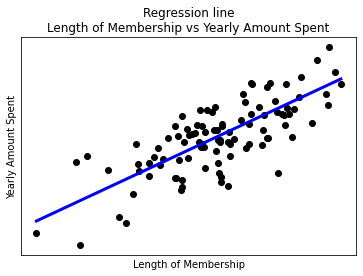

In [17]:
plot_fitted_line(intercept[0], coef[0][0], xTest, yTest, (xTest.columns[0], yTest.columns[0]))

### Use sklearn.metrics to calculate Mean absolute error, Mean squared error, Root mean squared error and R-squared for the results of your own function vs the sklearn regression results. Try to interprete your results.

In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [19]:
y_pred = result.predict(xTest)

In [20]:
y_pred

array([[493.36239897],
       [520.31855413],
       [545.31600502],
       [461.48520003],
       [492.99396212],
       [515.23721032],
       [485.32056439],
       [519.19322598],
       [451.02061187],
       [518.66711703],
       [478.38181964],
       [437.25997065],
       [426.42887189],
       [555.55213423],
       [463.1107777 ],
       [451.30776963],
       [513.53096689],
       [469.30389796],
       [435.0236958 ],
       [515.80181189],
       [475.81469361],
       [494.17254457],
       [470.85326474],
       [581.25694008],
       [454.79704458],
       [532.13523835],
       [591.85482738],
       [528.26564599],
       [457.33621854],
       [399.14605254],
       [549.43359953],
       [499.7166409 ],
       [500.76216078],
       [323.16216962],
       [536.67019854],
       [478.63718851],
       [552.52222761],
       [439.56421366],
       [477.91768464],
       [492.07791614],
       [501.5494264 ],
       [359.43550249],
       [494.16768989],
       [505

In [21]:
print('Mean absolute error: %.2f'
      % mean_absolute_error(yTest, y_pred))

print('Mean squared error: %.2f'
      % mean_squared_error(yTest, y_pred))

print('Root mean squared error: %.2f'
      % np.sqrt(mean_squared_error(yTest, y_pred)))

print('R-squared: %.2f'
      % r2_score(yTest, y_pred))

Mean absolute error: 37.84
Mean squared error: 2162.11
Root mean squared error: 46.50
R-squared: 0.56


### Fit linear regression to the data containing all numerical features using sklearn and use the same metrics to evaluate how good the model is.

In [22]:
data = pd.read_csv("Ecommerce.csv")
data.drop(['Email', 'Address', 'Avatar'], axis= 1, inplace= True)
data.head()

,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


In [23]:
xTrain, xTest, yTrain, yTest = train_test_split(
    data[data.columns.difference(['Yearly Amount Spent'])], data[['Yearly Amount Spent']],
    test_size= 0.2, random_state= 42)

In [24]:
result_multi = LinearRegression()
result_multi.fit(xTrain, yTrain)
y_pred = result_multi.predict(xTest)

In [25]:
result_multi.coef_, result_multi.intercept_

(array([[25.5962591 , 61.89682859, 38.78534598,  0.31038593]]),
 array([-1044.25741464]))

In [26]:
print('Coefficients: \n', result_multi.coef_)

print('Mean absolute error: %.2f'
      % mean_absolute_error(yTest, y_pred))

print('Mean squared error: %.2f'
      % mean_squared_error(yTest, y_pred))

print('Root mean squared error: %.2f'
      % np.sqrt(mean_squared_error(yTest, y_pred)))

print('R-squared: %.2f'
      % r2_score(yTest, y_pred))

Coefficients: 
 [[25.5962591  61.89682859 38.78534598  0.31038593]]
Mean absolute error: 8.56
Mean squared error: 109.86
Root mean squared error: 10.48
R-squared: 0.98
